In [1]:
# pip install pandas-profiling

## Import Relevant Libraries

In [2]:
import numpy as np  # Linear Algebra
import pandas as pd # data processing like reading of data
import matplotlib.pyplot as plt   # For plotting 
import seaborn as sns # For Plotting
# import pandas_profiling as pp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
VaccineD= pd.read_csv("Train.csv")
VaccineD.head(5)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


## Characteristics of the data


In [4]:
# The size of Data set
print('The size of the data is :', VaccineD.size)

# Show dimension of the data
print("The Dimension is: {}".format(VaccineD.shape))

The size of the data is : 40004
The Dimension is: (10001, 4)


The above shows that the size of the Dataset is 40004. This number is a product of the number of columns and rows present.

The data comprises of 4 columns and 10001 observations. 


In [5]:
#Viewing the Datatype details

VaccineD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [6]:
#Another way of checking for missing values

VaccineD.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

The above shows that the Data comprises of four columns with two columns with object datatypes and two being float datatypes.

The agreement column has missing values and well as the label column with one missing value. We will do a pandas profiling report to visualize the data for a clearer picture.

There will be no need for summary statistics because our data is primarily text and not numerical

In [7]:
# profile = VaccineD.profile_report(title='Pandas Profiling Report',
#                                plot={'histogram': {'bins': 8}}
#                               )
# profile.to_file(output_file='profileReport.html')
# profile


AttributeError: 'DataFrame' object has no attribute 'profile_report'

From the profiling report, we are also presented with warnings of 3 missing values. There are no duplicates. One from the label column, and the other from the agreement column. The Agreement column indicates the percentage of 3 reviewers who agreed on a given label. It will not be useful in our training and testing. 

In [8]:
#Dropping the Agreement column

VaccineDat = VaccineD.drop(['agreement'],axis=1)

#Dropping rows with missing values/NaN in any column
VaccineDat = VaccineDat.dropna()

#saving new data to a new csv files
VaccineDat.to_csv('Training.csv', index =False)
VaccineDat.head()

,tweet_id,safe_text,label
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0


In [9]:
#Ensuring no missing value rows exist
VaccineDat.isnull().sum()

tweet_id     0
safe_text    0
label        0
dtype: int64

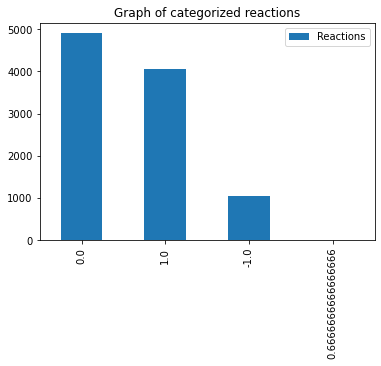

In [10]:
VaccineDat['label'].value_counts().plot(kind='bar',title='Graph of categorized reactions' ,label="Reactions")
plt.legend()
plt.savefig('Reactions.png')

In [11]:
#Deleting rows with label values not 1, -1 or 0
indexn = VaccineDat [ (VaccineDat['label']!=0) & (VaccineDat['label']!=1) & (VaccineDat['label']!=-1)] .index
                    
#or (VaccineDat['label']!=0) or (VaccineDat['label']!=-1) ].index


VaccineDat.drop(indexn, inplace = True)

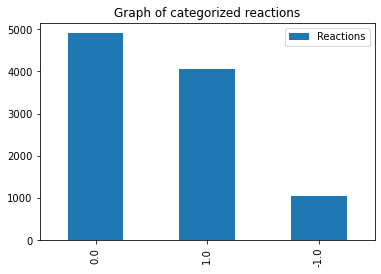

In [12]:
VaccineDat['label'].value_counts().plot(kind='bar',title='Graph of categorized reactions' ,label="Reactions")
plt.legend()
plt.savefig('Reactions.png')

In [13]:
VaccineDat['label'].value_counts()

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

In [14]:
VaccineDat

,tweet_id,safe_text,label
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0
...,...,...,...
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.0
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0


## Pre-processing Tweets in The Data Sets

In [20]:
# Relevant Libraries
import numpy as np
import re
import pickle
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wbeze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wbeze\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [21]:
# Separate features and the target

V_feature = VaccineDat['safe_text']
V_target = VaccineDat['label']

X, y = V_feature.values, V_target.values

In [41]:
# Text Preprocessing

tweet = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for atweet in range(0, len(X)):
    # Remove all the special characters
    tweets = re.sub(r'\W', ' ', str(X[atweet]))
    
    # Remove single characters from the start
    tweets = re.sub(r'\^[a-zA-Z]\s+', ' ', tweets) 
    
    # Removing URLs
    tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','<url>', tweets)
    tweets = re.sub('<url>',' ', tweets)
    
    # Removing usernames
    tweets = re.sub('@[^\s]+','<user>', tweets)
    tweets = re.sub('<user>',' ', tweets)
    
    # Removing the # in #hashtag
    tweets = re.sub(r'#([^\s]+)', r'\1', tweets)
    
    # Remove all single characters
    tweets = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweets)
    
    # Removing repeated characters (helloooooooo into hello)
#     tweets = word_tokenize(tweets)
    
    # Substituting multiple spaces with single space
    tweets = re.sub(r'\s+', ' ', tweets, flags=re.I)
    
    # Converting to Lowercase
    tweets = tweets.lower()
    
    # Lemmatization
    tweets = tweets.split()

    tweets = [stemmer.lemmatize(word) for word in tweets]
    tweets = ' '.join(tweets)
    
    tweet.append(tweets)


In [48]:
# Term frequency = (Number of Occurrences of a word)/(Total words in the document)
# IDF(word) = Log((Total number of documents)/(Number of documents containing the word))

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(tweet).toarray()

## Training the Model

In [55]:
# Split the data into a training and validation set

from sklearn.model_selection import train_test_split # helps efficiently split a dataset for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Training Set: %d, Test Set: %d \n' % (X_train.size, X_test.size))

Training Set: 11998500, Test Set: 3000000 



## Using a model created from the RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
# Making Predictions with validation set
y_pred = classifier.predict(X_test)

In [59]:
# Evaluating the Model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 28  29 144]
 [  9 754 229]
 [  4 126 677]]
              precision    recall  f1-score   support

        -1.0       0.68      0.14      0.23       201
         0.0       0.83      0.76      0.79       992
         1.0       0.64      0.84      0.73       807

    accuracy                           0.73      2000
   macro avg       0.72      0.58      0.58      2000
weighted avg       0.74      0.73      0.71      2000

0.7295


In [ ]:
# Saving the Model
# with open('tweet_classifier', 'wb') as picklefile:
#     pickle.dump(classifier,picklefile)
    
# from sklearn.externals import joblib
#    joblib.dump(your_algo,  'pickle_file_name.pkl',compress=3)